In [5]:
######import packages ###########################
#################################################
from astropy.io import fits

import matplotlib
import matplotlib.pyplot as plt
import math 
from math import cos, radians
import pyfits
from astropy.io import fits
import astropy.io.ascii as ascii 
import os
import numpy as np
from astropy import units as u
from astropy.utils import data
#import pandas as pd
import matplotlib.gridspec as gridspec
import aplpy

from spectral_cube import SpectralCube
import warnings
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams.update({'font.size': 22})

matplotlib.rcParams['axes.linewidth']=2
matplotlib.rcParams['lines.linewidth']=2
plt.rcParams['axes.linewidth'] = 2.

In [6]:
###############################################################
## Adams pvextractor (function format)
###############################################################

def sample_points_edges(x,y,spacing):

    #x, y = zip(x,y)
    global d_sampled , x_sampled, y_sampled
    # Find the distance interval between all pairs of points
    dx = np.diff(x)
    dy = np.diff(y)
    dd = np.hypot(dx, dy)

    # Find the total displacement along the broken curve
    d = np.hstack([0., np.cumsum(dd)])

    # Figure out the number of points to sample, and stop short of the
    # last point.
    n_points = np.floor(d[-1] / spacing)

    if n_points == 0:
        raise ValueError("Path is shorter than spacing")

    d_sampled = np.linspace(0, n_points * spacing, n_points + 1)

    
    x_sampled = np.interp(d_sampled, d, x)

  

    y_sampled = np.interp(d_sampled, d, y)

    return d_sampled, x_sampled, y_sampled


def sample_points():

    global x_sampled, y_sampled
    
    x_sampled = 0.5 * (x_sampled[:-1] + x_sampled[1:])
    y_sampled = 0.5 * (y_sampled[:-1] + y_sampled[1:])

    return x_sampled, y_sampled
######################################################
def q(x, A, B): # this is your 'straight line' y=f(x)
   return A*x + B

def line(x): # when you optimized your line , you need to use this function to drow your line

    return popt[0]*x+popt[1]
######################################################

len of disperse results: 139
len= 456
dis= 114
lenght= 0.8344936439480503
pix= 114
relative_position= 455
n is :114
len of disperse results: 100
len= 396
dis= 99
lenght= 0.7353377990384391
pix= 99
relative_position= 395
n is :99
len of disperse results: 152
len= 398
dis= 100
lenght= 0.7242474268313025
pix= 100
relative_position= 397
n is :100
len of disperse results: 244
len= 403
dis= 101
lenght= 0.7486749997511817
pix= 101
relative_position= 402
n is :101
len of disperse results: 98
len= 299
dis= 75
lenght= 0.5484760919831043
pix= 75
relative_position= 298
n is :75
len of disperse results: 56
len= 169
dis= 42
lenght= 0.30653269768314606
pix= 43
relative_position= 168
n is :43


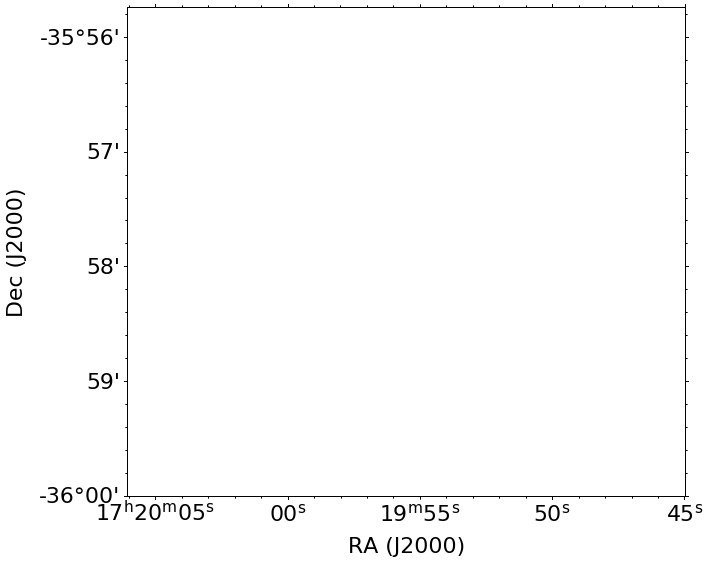

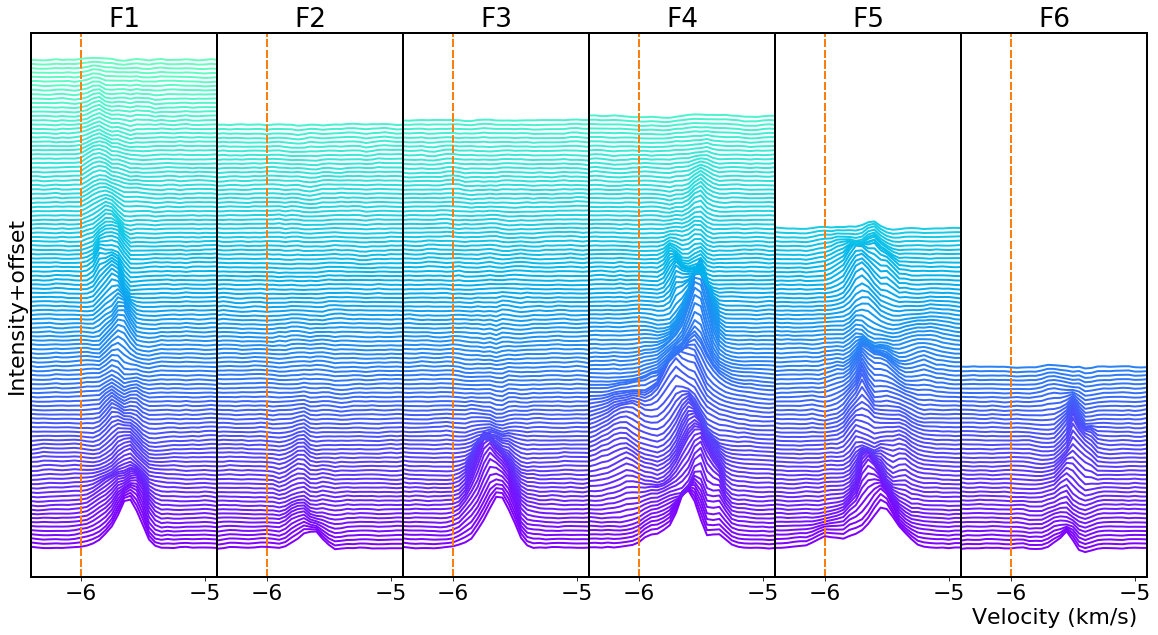

In [12]:

######read cube and filament line################
############-####################################

gc=aplpy.FITSFigure('../../../data/alma_data/spw1_continuum/Continuum_peak.fits')


fitfile = '../../../data/alma_data/spw7_h13co+/H13COp_100chans_vel.fits'

data, header = fits.getdata( fitfile, header=True) 
Listvel= []
bmin = header['BMIN'] * u.arcsec
bmaj = header['BMAJ'] *u.arcsec
velStep = header['CDELT3']
velStart = header ['CRVAL3']
velRange = header['NAXIS3']

cube = SpectralCube.read(fitfile)
#print(cube.shape)

l= 0

while l < velRange:
    vel_l = (velStart + (velStep * l))/10000
    Listvel.append(vel_l)
    l+=1


    
    



filid=['1' , '2', '3', '4', '5', '6']
fig, axs = plt.subplots(1,len(filid), sharex=True, sharey=True, gridspec_kw={'wspace': 0}, figsize=(20,10))

for ii in range(len(filid)):
    ListPixel_new = [] 
    x_center=[]
    y_center=[]
    #print('Listvel=', Listvel)
    #print ('ii=', ii)
    datafile = open('/home/mitra/Documents/projects/ngc6334/filaments/New_filament_2022/txt_regions/filament_' + filid[ii] + '.txt')
    data1_al = datafile.readlines()
    endpoints =[]
    for j in range (0, len(data1_al), 1):                      #modify list of selection interval pixels
        endpoints.append(list(map(float, data1_al[j].split())))
    print("len of disperse results:", len(endpoints))
    Pixel_x_inter = list(zip(*endpoints))[0]
    Pixel_y_inter = list(zip(*endpoints))[1]
    spacing = 1
    sample_points_edges((Pixel_x_inter),(Pixel_y_inter),spacing)
    sample_points()
    #print(len(Pixel_x_inter))
    for i in range(0,len(x_sampled)):
        xp = int(x_sampled[i])
        x_center.append(xp)
        yp = int(y_sampled[i])
        y_center.append(yp)
        ListPixel_new.append((xp,yp))
    print('len=',len(ListPixel_new))
    #print(len(ListPixel_new))
    
    d_total = 0
    relative_position=[]
    ra_c, dec_c=gc.pixel2world(x_center, y_center)
    #print("ra =", ra_c)
    for i in range(len(ra_c)-1):
        d = np.sqrt(((ra_c[i+1]-ra_c[i])*cos(radians(dec_c[i])))**2+(dec_c[i+1]-dec_c[i])**2)*3600  # distance in arcsec
        d_pc=d*4.84*(10**-6)*(1760)
        d_total = d_total + d_pc
        #print("d", d_total)
        relative_position.append(d_total)
    dis = relative_position[::4]
    pix = ListPixel_new[::4]
    print('dis=', len(dis))
    print('lenght=', dis[-1])
    print('pix=', len(pix))
    print('relative_position=', len(relative_position))
    '''
    data2 =[]
    for j in range (0, len(ListPixel_new), 100):
        data2.append(list(map(float, ListPixel_new[j].split())))
    #print(data2)
    '''
    n = len(pix) 
    colors = plt.cm.rainbow(np.linspace(0,1,250))
    print('n is :%d'%n)
    #fig = plt.figure(figsize=(4,6))
    #ax = fig.add_subplot(111)	
    m = 0
    for k, i in enumerate(pix):
    #for k in range (0, len(ListPixel_new), 4):
        x = int(pix[k][0])
        y = int(pix[k][1])
        subcube = cube[:, x-20:x+20, y-20:y+20]
        spectrum = subcube.mean(axis=(1,2)) 
        Listspec= spectrum + k * 0.006 * u.Jy / u.beam
        
        if m<n:
            axs[ii].plot(Listvel, Listspec, color=colors[m])
            axs[ii].set_title('F'+filid[ii])
            axs[ii].set_xlim([-6.4, -4.9])
            #axs[ii].set_yticks([0, 25, 50, 75, 98])
            #axs[ii].set_xlabel('Velocity (km/s)')
            axs[ii].set_ylabel('Intensity+offset')
            axs[ii].set_yticks([])
            axs[ii].axvline(x = -6., color = 'tab:orange', ls='--', label = 'systemic velocity')
            #axs[ii].set_yticklabels([])
            #axs[ii].set_yticklabels([dis[0], dis[k+25], dis[k+50], dis[75], dis[98]])
            m+=1
            #plt.hold(True)
    #axs[0].set_yticklabels([dis[0], dis[25], dis[50], dis[75], dis[100]])
    for ax in axs:
        ax.label_outer()
        #plt.hold(True)
           
#'veluency (GHz)')
#plt.ylabel('Intensity+offset')
plt.xlabel('Velocity (km/s)')
    #plt.savefig('plots/data%d.pdf'%ii)
    #fig.suptitle('[$H42 \\alpha$] core spectrum ')


plt.savefig('plots/pv_SUBplot1.pdf', bbox_inches='tight', dpi=300)

plt.show()
